In [380]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier as rcf
from sklearn.tree import DecisionTreeClassifier as dct
from sklearn.model_selection import cross_val_score
#from lightgbm import LGBMClassifier as lgb
from sklearn.tree import DecisionTreeClassifier as dct
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
#from catboost import CatBoostClassifier, 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [496]:
train  = pd.read_csv(r'C:\Users\hemanth.kumar\Downloads\Supplement Sales Prediction\TRAIN.csv')

test  = pd.read_csv(r'C:\Users\hemanth.kumar\Downloads\Supplement Sales Prediction\TEST_FINAL.csv')

In [497]:
print (train.shape)

print (test.shape)

(188340, 10)
(22265, 8)


In [498]:
train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [499]:
test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

<AxesSubplot:xlabel='Sales', ylabel='Density'>

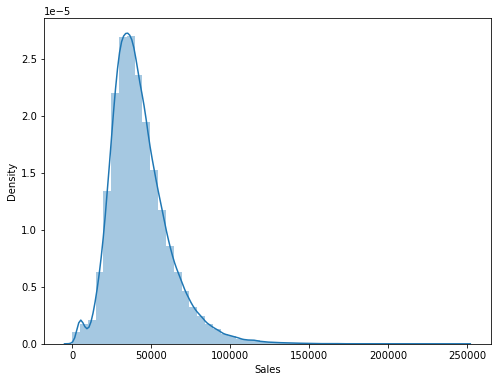

In [500]:
sns.distplot(train['Sales'])

# Data Contains Outliers

In [501]:
train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


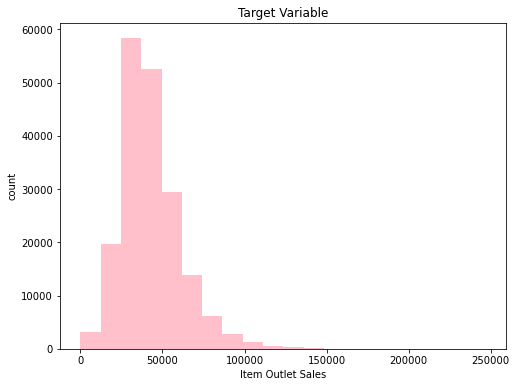

In [502]:
plt.hist(train['Sales'], bins = 20, color = 'pink')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

<AxesSubplot:xlabel='Sales'>

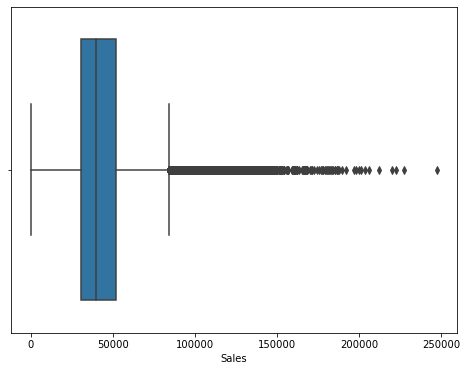

In [503]:
sns.boxplot(train['Sales'])

#Data Contains Outliers

In [504]:
train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

# Data does't have any null values

In [505]:
train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

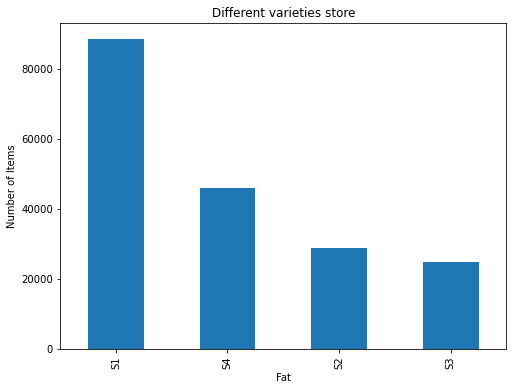

In [506]:
# we will analyze only the training set

train['Store_Type'].value_counts(normalize = True)
train['Store_Type'].value_counts().plot.bar()
plt.title('Different varieties store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

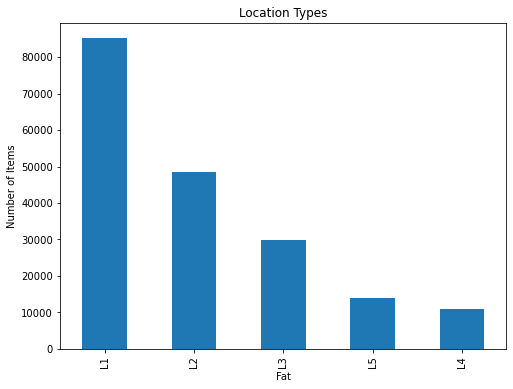

In [507]:
train['Location_Type'].value_counts(normalize = True)
train['Location_Type'].value_counts().plot.bar()
plt.title('Location Types')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [508]:
# LOCATION Type L4 & L5 not frequently occured

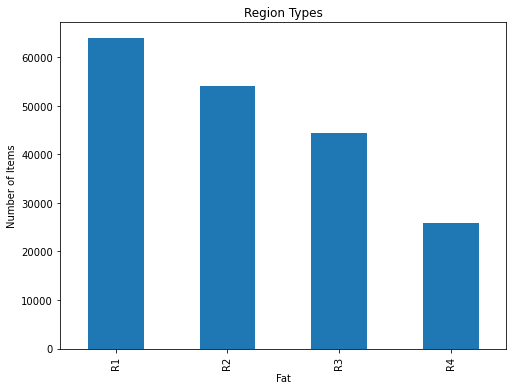

In [509]:
train['Region_Code'].value_counts(normalize = True)
train['Region_Code'].value_counts().plot.bar()
plt.title('Region Types')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

# Outlier Removal

In [510]:
from scipy import stats
import numpy as np

# IQR
Q1 = np.percentile(train['Sales'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(train['Sales'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

21483.0

In [511]:
#train_org = train

# Outliers Removed based on Sales Data

In [512]:
print("Old Shape: ", train.shape)
 
# Upper bound
upper = np.where(train['Sales'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(train['Sales']<= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
train.drop(upper[0], inplace = True)
train.drop(lower[0], inplace = True)
 
print("New Shape: ", train.shape)

Old Shape:  (188340, 10)
New Shape:  (182497, 10)


<AxesSubplot:xlabel='Sales'>

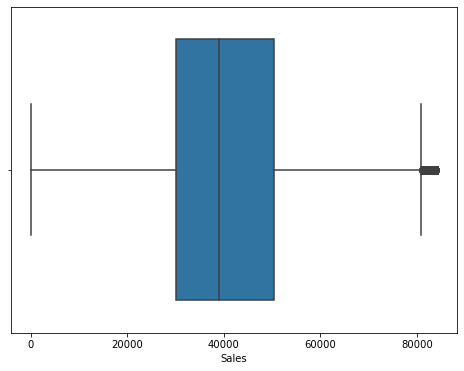

In [513]:
sns.boxplot(train['Sales'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

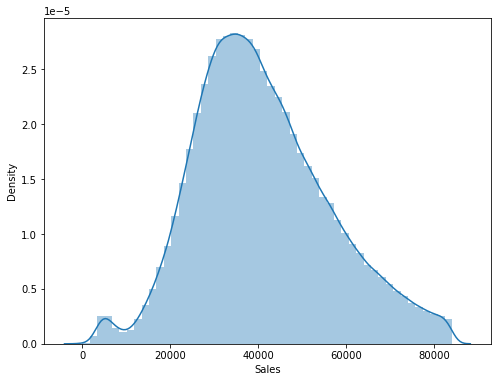

In [514]:
sns.distplot(train['Sales'])

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

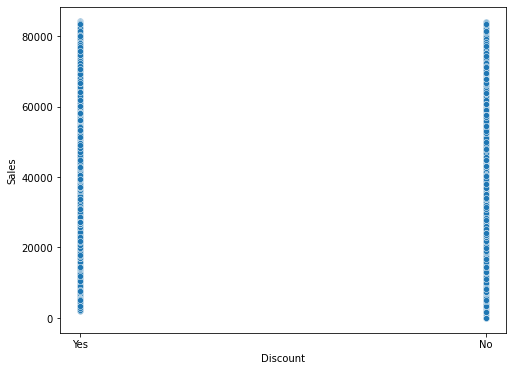

In [515]:
sns.scatterplot(x="Discount", y="Sales", data=train) 

<AxesSubplot:xlabel='Holiday', ylabel='Sales'>

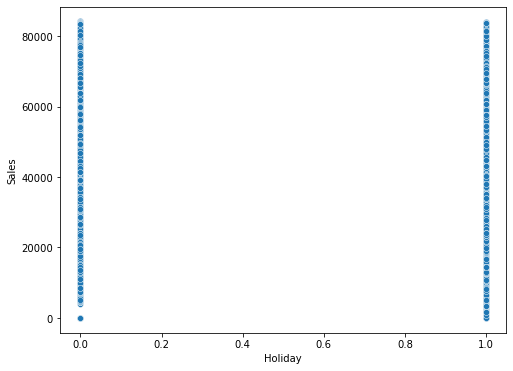

In [516]:
sns.scatterplot(x="Holiday", y="Sales", data=train) 

<AxesSubplot:xlabel='Location_Type', ylabel='Sales'>

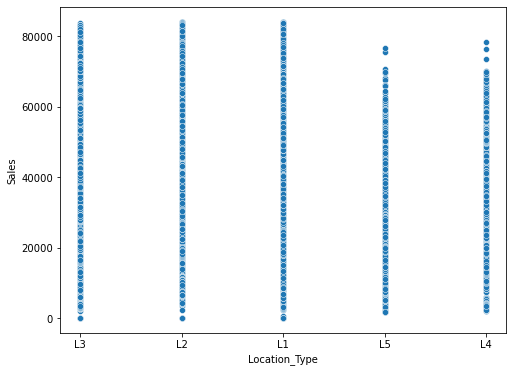

In [517]:
sns.scatterplot(x="Location_Type", y="Sales", data=train) 

In [518]:
# lOCATION TYPE 2 HAVE MORE NUMBER OF SALES ,COMPARE TO OTHER Location type

<AxesSubplot:xlabel='Region_Code', ylabel='Sales'>

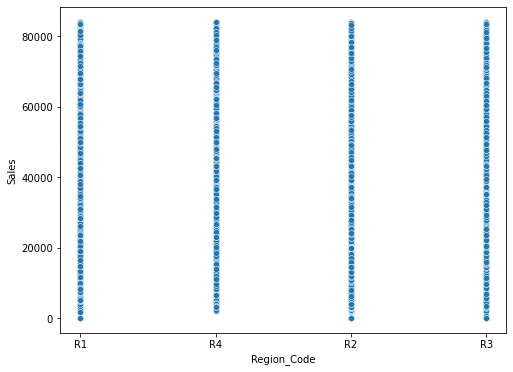

In [519]:

sns.scatterplot(x="Region_Code", y="Sales", data=train) 

<AxesSubplot:xlabel='Region_Code', ylabel='#Order'>

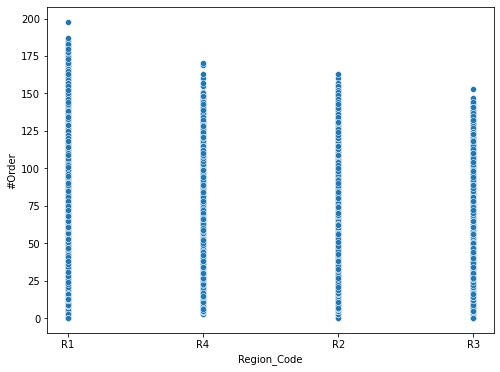

In [520]:
sns.scatterplot(x="Region_Code", y="#Order", data=train) 

<AxesSubplot:xlabel='Holiday', ylabel='#Order'>

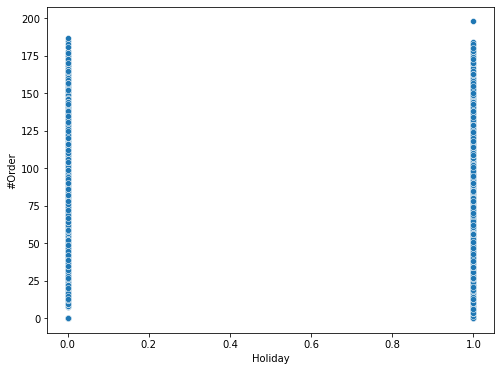

In [521]:
sns.scatterplot(x="Holiday", y="#Order", data=train) 

<AxesSubplot:xlabel='#Order', ylabel='Sales'>

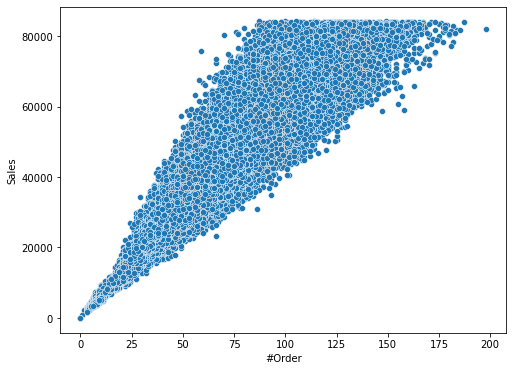

In [522]:
sns.scatterplot(x="#Order", y="Sales", data=train) 

# If number if orders increasing sales also increasing

In [523]:
 #BUT Unfortunately Orders Column not present tets data

In [524]:
train.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

<AxesSubplot:xlabel='#Order', ylabel='Density'>

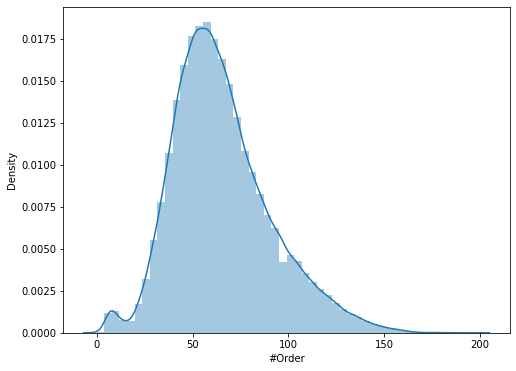

In [525]:
sns.distplot(train['#Order'])

<AxesSubplot:xlabel='#Order'>

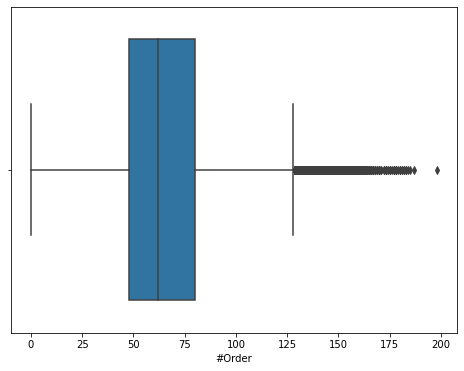

In [526]:
sns.boxplot(train['#Order'])

In [527]:
train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [528]:
train['#Order'].describe()

count    182497.000000
mean         65.320208
std          25.577497
min           0.000000
25%          48.000000
50%          62.000000
75%          80.000000
max         198.000000
Name: #Order, dtype: float64

In [472]:
# Outliers removal based on Orders Data

In [531]:
print ('Old Shape',train.shape)



train = train[(train['#Order'] >= 8) & (df['#Order'] <= 300)]



print ('new Shape',train.shape)

Old Shape (182497, 10)
new Shape (181594, 10)


In [532]:
train['#Order'].describe()

count    181594.000000
mean         65.616805
std          25.291754
min           8.000000
25%          48.000000
50%          62.000000
75%          80.000000
max         198.000000
Name: #Order, dtype: float64

<AxesSubplot:xlabel='#Order', ylabel='Density'>

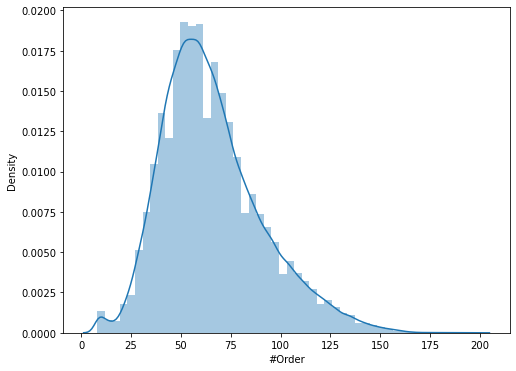

In [533]:
sns.distplot(df['#Order'])

In [340]:
train = df.copy()

In [341]:
train.shape

(181594, 10)

In [28]:
test.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount'],
      dtype='object')

In [534]:
from datetime import datetime
from datetime import timedelta
import holidays
train['Date']= train['Date'].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))

test['Date'] = test['Date'].apply(lambda x : datetime.strptime(x, "%Y-%m-%d"))

In [343]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


# Feature Engineering

In [535]:
# From DATE Column Creating Different features like year month

train['year'] = pd.DatetimeIndex(train['Date']).year
train['month'] = pd.DatetimeIndex(train['Date']).month
train['Day'] = pd.DatetimeIndex(train['Date']).day
train['Quarter'] =  pd.DatetimeIndex(train['Date']).quarter

test['year'] = pd.DatetimeIndex(test['Date']).year
test['month'] = pd.DatetimeIndex(test['Date']).month
test['Day'] = pd.DatetimeIndex(test['Date']).day
test['Quarter'] =  pd.DatetimeIndex(test['Date']).quarter
#train['week_of_Every_year'] =  pandas.DatetimeIndex(dataframe_to_be_provided[week_start_to_be_provided]).weekofyear


In [345]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,year,month,Day,Quarter
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1,1


<AxesSubplot:xlabel='month', ylabel='Sales'>

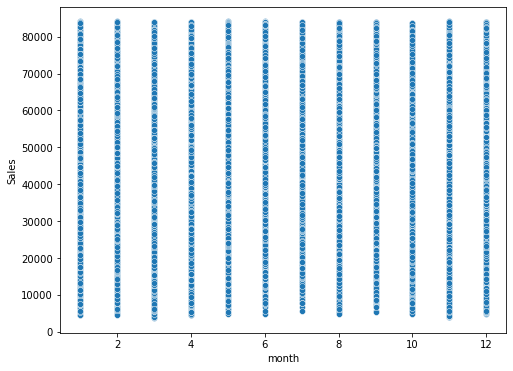

In [346]:
sns.scatterplot(x="month", y="Sales", data=train) 

<AxesSubplot:xlabel='year', ylabel='Sales'>

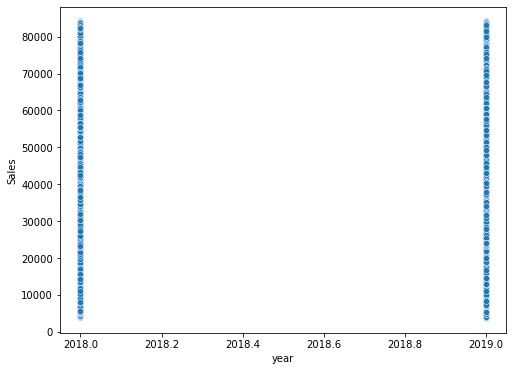

In [347]:

sns.scatterplot(x="year", y="Sales", data=train) 

<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

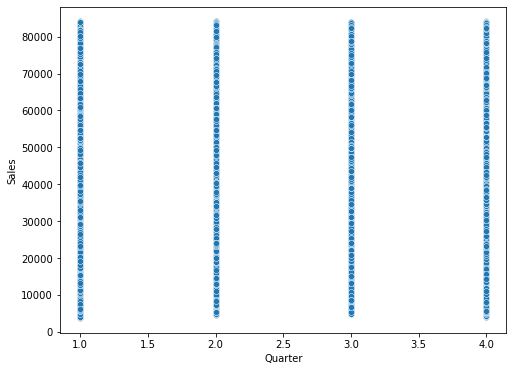

In [348]:
sns.scatterplot(x="Quarter", y="Sales", data=train) 

<AxesSubplot:xlabel='Store_Type', ylabel='Sales'>

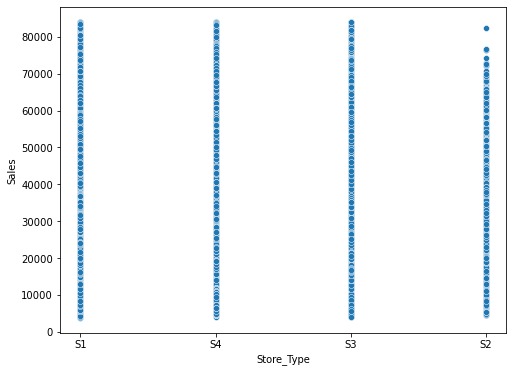

In [349]:
sns.scatterplot(x="Store_Type", y="Sales", data=train) 

There are 8 numeric and 6 categorical columns in train data


<AxesSubplot:>

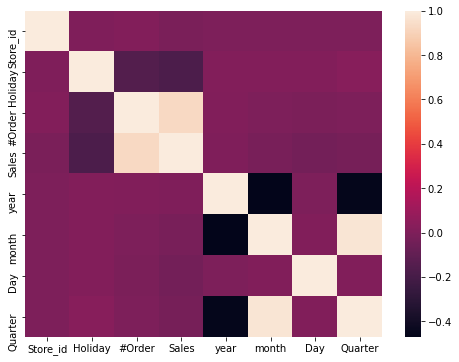

In [403]:
#separate variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

In [351]:
print (corr['Sales'].sort_values(ascending=False)[:15], '\n')

Sales       1.000000
#Order      0.924379
year       -0.001424
Store_id   -0.010880
month      -0.011972
Quarter    -0.015545
Day        -0.038385
Holiday    -0.146888
Name: Sales, dtype: float64 



In [352]:
# Here We can see # order have more correalted with target variable ,but unfortunately #order not exixt in test data

In [353]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
X = corr
calc_vif(X)

,variables,VIF
0,Store_id,1.069224
1,Holiday,1.305082
2,#Order,169.254230
3,Sales,171.106879
4,year,2.881699
5,month,1352.611553
6,Day,1.063770
7,Quarter,1328.503222


In [354]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,year,month,Day,Quarter
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1,1


In [355]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,year,month,Day,Quarter
0,T1188341,171,S4,L2,R3,2019-06-01,0,No,2019,6,1,2
1,T1188342,172,S1,L1,R1,2019-06-01,0,No,2019,6,1,2
2,T1188343,173,S4,L2,R1,2019-06-01,0,No,2019,6,1,2
3,T1188344,174,S1,L1,R4,2019-06-01,0,No,2019,6,1,2
4,T1188345,170,S1,L1,R2,2019-06-01,0,No,2019,6,1,2


In [362]:
grouped_df = train.groupby(['Location_Type','Region_Code','Store_Type'])

final = grouped_df[['#Order','Sales']].agg('mean')
final

#Order         Sales
Location_Type Region_Code Store_Type                          
L1            R1          S1           57.742814  38077.440003
                          S2           45.236275  33280.881324
                          S3           72.825971  42707.612597
                          S4           89.168568  49414.298297
              R2          S1           59.746890  38917.284151
                          S2           44.444735  33216.595213
                          S3           71.574986  45215.293447
                          S4           89.021768  51812.226708
              R3          S1           59.383832  40048.626357
                          S2           42.950980  31222.794706
                          S3           72.909628  45001.652179
                          S4           87.365347  49201.316733
              R4          S1           56.169246  38403.268639
                          S2           46.221135  33952.383728
                          S3           71.391304  46062.606937
                          S4           94.737374  54172.789273
L2            R1          S1           64.250988  45060.073814
                          S3           71.746867  50606.575068
                          S4          103.516503  58758.513641
              R2          S1           64.559300  46960.735639
                          S3           73.348932  52253.790305
                          S4           95.534541  56667.923637
              R3          S1           64.458126  47359.536491
                          S3           74.324541  50648.072744
                          S4           87.215494  55045.911996
              R4          S1           64.541069  47443.250437
                          S3           72.796887  50701.882398
                          S4           90.903315  55453.829718
L3            R1          S1           59.191892  34580.689874
                          S2           46.257367  31552.299784
                          S3           73.022610  39184.321589
              R2          S1           57.106348  34574.485460
                          S2           44.641709  30142.872301
              R3          S1           52.955483  33431.993844
                          S2           41.357883  29768.567356
                          S3           70.986434  39500.716337
              R4          S1           55.634766  34565.235996
                          S2           41.552157  29395.938188
L4            R1          S1           55.705137  31683.308573
              R2          S1           52.066450  30239.905876
                          S2           41.217647  27260.737706
              R3          S1           49.901757  30248.939766
                          S2           41.035294  27985.257588
              R4          S2           36.824510  25798.952912
L5            R1          S1           58.465467  30494.698789
                          S2           37.749325  23217.036409
              R2          S1           49.770033  28089.335296
                          S2           38.562051  24562.726009
              R3          S2           37.532811  24124.920176
              R4          S2           37.398529  24505.460000

# Based on Location & Region ,Store type Imputing New column in both train test data

In [421]:
train['Avg_Order'] = 0

test['Avg_Order'] = 0

train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S1')]= 57

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S1')]= 57

train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S2')]= 44

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S2')]= 44

train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S3')]= 72

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S3')]= 72

train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S4')]= 88

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S4')]= 88



##
train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S1')]= 59

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S1')]= 59

train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S2')]= 44

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S2')]= 44

train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S3')]=  71

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S2')]= 71

train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S4')]=  88

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S4')]= 88


##
train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R3') &(train['Store_Type']  == 'S1')]=   59

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R3') &(test['Store_Type']  == 'S1')]= 59

train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R3') &(train['Store_Type']  == 'S2')]=  42

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R3') &(test['Store_Type']  == 'S2')]= 42

train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R3') &(train['Store_Type']  == 'S3')]=  73

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R3') &(test['Store_Type']  == 'S3')]= 73

train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R3') &(train['Store_Type']  == 'S4')]=  86

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R3') &(test['Store_Type']  == 'S4')]= 86



######

train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R4') &(train['Store_Type']  == 'S1')]=   56

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R4') &(test['Store_Type']  == 'S1')]= 56

train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R4') &(train['Store_Type']  == 'S2')]=  46

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R4') &(test['Store_Type']  == 'S2')]= 46

train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R4') &(train['Store_Type']  == 'S3')]=  71

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R4') &(test['Store_Type']  == 'S3')]= 71

train['Avg_Order'].loc[(train['Location_Type'] == 'L1') & (train['Region_Code'] == 'R4') &(train['Store_Type']  == 'S4')]=  94

test['Avg_Order'].loc[(test['Location_Type'] == 'L1') & (test['Region_Code'] == 'R4') &(test['Store_Type']  == 'S4')]= 94


######

train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S1')]=   64

test['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S1')]= 64

#train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S2')]=  

#test['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S2')]= 

train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S3')]=  71 

test['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S3')]= 71

train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S4')]=   103 

test ['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S4')]= 103


##
train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S1')]=   64

test['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S1')]= 64

#train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S2')]=  

#test['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S2')]= 

train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S3')]=  73 

test['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S3')]= 73

train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S4')]=   95 

test ['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S4')]= 95


##
train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R3') &(train['Store_Type']  == 'S1')]=   64

test['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R3') &(test['Store_Type']  == 'S1')]= 64

#train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S2')]=  

#test['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S2')]= 

train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R3') &(train['Store_Type']  == 'S3')]=  74 

test['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R3') &(test['Store_Type']  == 'S3')]= 74

train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R3') &(train['Store_Type']  == 'S4')]=   87 

test ['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R3') &(test['Store_Type']  == 'S4')]= 87


##
train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R4') &(train['Store_Type']  == 'S1')]=   64

test['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R4') &(test['Store_Type']  == 'S1')]= 64

#train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S2')]=  

#test['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S2')]= 

train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R4') &(train['Store_Type']  == 'S3')]=  72 

test['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R4') &(test['Store_Type']  == 'S3')]= 72

train['Avg_Order'].loc[(train['Location_Type'] == 'L2') & (train['Region_Code'] == 'R4') &(train['Store_Type']  == 'S4')]=   90 

test ['Avg_Order'].loc[(test['Location_Type'] == 'L2') & (test['Region_Code'] == 'R4') &(test['Store_Type']  == 'S4')]= 90



##
train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S1')]=   59

test['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S1')]= 59

train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S2')]=  46

test['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S2')]= 46

train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S3')]=  46 

test['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S3')]= 46

train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S4')]=   73 

test ['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S4')]= 73



##
train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S1')]=   57

test['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S1')]= 57

train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S2')]=  44

test['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S2')]=  44

#train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S3')]=  46 

#test['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S3')]= 46

#train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S4')]=   73 

#test ['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S4')]= 73



##
train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R3') &(train['Store_Type']  == 'S1')]=   52

test['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R3') &(test['Store_Type']  == 'S1')]= 52

train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R3') &(train['Store_Type']  == 'S2')]=   41

test['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R3') &(test['Store_Type']  == 'S2')]= 41

train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R3') &(train['Store_Type']  == 'S3')]=  70

test['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R3') &(test['Store_Type']  == 'S3')]= 70

#train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R3') &(train['Store_Type']  == 'S4')]=   73 

#test ['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R3') &(test['Store_Type']  == 'S4')]= 73



##
train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R4') &(train['Store_Type']  == 'S1')]=   55

test['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R4') &(test['Store_Type']  == 'S1')]= 55

train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R4') &(train['Store_Type']  == 'S2')]=   41

test['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R4') &(test['Store_Type']  == 'S2')]= 41

#train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R4') &(train['Store_Type']  == 'S3')]=  70

#test['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R4') &(test['Store_Type']  == 'S3')]= 70

#train['Avg_Order'].loc[(train['Location_Type'] == 'L3') & (train['Region_Code'] == 'R4') &(train['Store_Type']  == 'S4')]=   73 

#test ['Avg_Order'].loc[(test['Location_Type'] == 'L3') & (test['Region_Code'] == 'R4') &(test['Store_Type']  == 'S4')]= 73



##
train['Avg_Order'].loc[(train['Location_Type'] == 'L4') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S1')]=   55

test['Avg_Order'].loc[(test['Location_Type'] == 'L4') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S1')]= 55


##
train['Avg_Order'].loc[(train['Location_Type'] == 'L4') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S2')]=   41

test['Avg_Order'].loc[(test['Location_Type'] == 'L4') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S2')]= 41

train['Avg_Order'].loc[(train['Location_Type'] == 'L4') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S1')]=  52

test['Avg_Order'].loc[(test['Location_Type'] == 'L4') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S1')]= 52

#train['Avg_Order'].loc[(train['Location_Type'] == 'L4') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S4')]=   73 

#test ['Avg_Order'].loc[(test['Location_Type'] == 'L4') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S4')]= 73



train['Avg_Order'].loc[(train['Location_Type'] == 'L4') & (train['Region_Code'] == 'R3') &(train['Store_Type']  == 'S2')]=   41

test['Avg_Order'].loc[(test['Location_Type'] == 'L4') & (test['Region_Code'] == 'R3') &(test['Store_Type']  == 'S2')]= 41

train['Avg_Order'].loc[(train['Location_Type'] == 'L4') & (train['Region_Code'] == 'R3') &(train['Store_Type']  == 'S1')]=  49

test['Avg_Order'].loc[(test['Location_Type'] == 'L4') & (test['Region_Code'] == 'R3') &(test['Store_Type']  == 'S1')]= 49


train['Avg_Order'].loc[(train['Location_Type'] == 'L4') & (train['Region_Code'] == 'R4') &(train['Store_Type']  == 'S2')]=   36

test['Avg_Order'].loc[(test['Location_Type'] == 'L4') & (test['Region_Code'] == 'R4') &(test['Store_Type']  == 'S2')]= 36





train['Avg_Order'].loc[(train['Location_Type'] == 'L5') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S1')]=   58

test['Avg_Order'].loc[(test['Location_Type'] == 'L5') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S1')]= 58

train['Avg_Order'].loc[(train['Location_Type'] == 'L5') & (train['Region_Code'] == 'R1') &(train['Store_Type']  == 'S2')]=  37

test['Avg_Order'].loc[(test['Location_Type'] == 'L5') & (test['Region_Code'] == 'R1') &(test['Store_Type']  == 'S2')]= 37




train['Avg_Order'].loc[(train['Location_Type'] == 'L5') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S1')]=   49

test['Avg_Order'].loc[(test['Location_Type'] == 'L5') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S1')]= 49

train['Avg_Order'].loc[(train['Location_Type'] == 'L5') & (train['Region_Code'] == 'R2') &(train['Store_Type']  == 'S2')]=  38

test['Avg_Order'].loc[(test['Location_Type'] == 'L5') & (test['Region_Code'] == 'R2') &(test['Store_Type']  == 'S2')]= 38




train['Avg_Order'].loc[(train['Location_Type'] == 'L5') & (train['Region_Code'] == 'R3') &(train['Store_Type']  == 'S2')]=  37

test['Avg_Order'].loc[(test['Location_Type'] == 'L5') & (test['Region_Code'] == 'R3') &(test['Store_Type']  == 'S2')]= 37



train['Avg_Order'].loc[(train['Location_Type'] == 'L5') & (train['Region_Code'] == 'R4') &(train['Store_Type']  == 'S2')]=  37

test['Avg_Order'].loc[(test['Location_Type'] == 'L5') & (test['Region_Code'] == 'R4') &(test['Store_Type']  == 'S2')]= 37









In [494]:
train['#Order'].describe()

count    182497.000000
mean         65.320208
std          25.577497
min           0.000000
25%          48.000000
50%          62.000000
75%          80.000000
max         198.000000
Name: #Order, dtype: float64

There are 9 numeric and 6 categorical columns in train data


<AxesSubplot:>

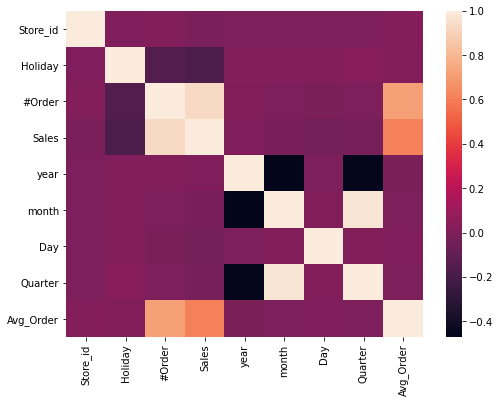

In [422]:
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)


In [423]:
print (corr['Sales'].sort_values(ascending=False)[:15], '\n')

Sales        1.000000
#Order       0.926483
Avg_Order    0.611893
year         0.000938
Store_id    -0.010977
month       -0.022186
Quarter     -0.023902
Day         -0.033989
Holiday     -0.172472
Name: Sales, dtype: float64 



In [536]:
train_df  =train
test_df = test


In [537]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,year,month,Day,Quarter
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1,1


In [538]:
train_df.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales', 'year', 'month', 'Day',
       'Quarter'],
      dtype='object')

In [539]:
y = train_df[['Sales']]

In [540]:
X = train_df.drop(['ID','Store_id','Date','#Order','Sales','Day'],axis =1)

In [541]:
X = pd.get_dummies(X)

In [542]:
X.head()

,Holiday,year,month,Quarter,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes
0,1,2018,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,1,2018,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,1,2018,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,1,2018,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,1,2018,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1


In [543]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [544]:
import xgboost as xgb
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error

In [414]:
xgb_model = XGBRegressor(

        learning_rate = 0.01,
        max_depth = 1,
        min_child_weight = 3,
        n_estimators = 500)

%time xgb_model.fit(X_train, y_train, verbose=False)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_squared_log_error(y_test, y_pred_xgb)

print("mean_squared_log_error: ", mae_xgb)

Wall time: 3.54 s
mean_squared_log_error:  0.12476710033374089


In [545]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

# predicting the  test set results
y_pred = lr.predict(X_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_log_error(y_test, y_pred)
print('RMSE :', (mse))


[[23897.86627927]
 [20218.95647632]
 [30481.04015142]
 ...
 [53786.51461366]
 [38646.33891853]
 [30482.20051719]]
RMSE : 0.08384781508387484


In [122]:
from sklearn.ensemble import AdaBoostRegressor

Ada_Boost= AdaBoostRegressor(n_estimators = 100)
Ada_Boost.fit(X_train, y_train)

# predicting the test set results
y_pred = Ada_Boost.predict(X_test)

mse = mean_squared_log_error(y_test, y_pred)
mse

0.1337384177534646

In [93]:
X.columns

Index(['Holiday', 'year', 'month', 'Day', 'Quarter', 'Store_Type_S1',
       'Store_Type_S2', 'Store_Type_S3', 'Store_Type_S4', 'Location_Type_L1',
       'Location_Type_L2', 'Location_Type_L3', 'Location_Type_L4',
       'Location_Type_L5', 'Region_Code_R1', 'Region_Code_R2',
       'Region_Code_R3', 'Region_Code_R4', 'Discount_No', 'Discount_Yes'],
      dtype='object')

In [546]:
test_data  =test_df

In [547]:
test_x = test_data.drop(['ID','Store_id','Date','Day'],axis =1)

In [548]:
yy = pd.get_dummies(test_x)

In [549]:
yy.columns

Index(['Holiday', 'year', 'month', 'Quarter', 'Store_Type_S1', 'Store_Type_S2',
       'Store_Type_S3', 'Store_Type_S4', 'Location_Type_L1',
       'Location_Type_L2', 'Location_Type_L3', 'Location_Type_L4',
       'Location_Type_L5', 'Region_Code_R1', 'Region_Code_R2',
       'Region_Code_R3', 'Region_Code_R4', 'Discount_No', 'Discount_Yes'],
      dtype='object')

In [98]:
y_test = xgb_model.predict(yy)

In [550]:
y_lr = lr.predict(yy)

In [126]:
y_Ada_Boost = Ada_Boost.predict(yy)

data = pd.DataFrame()
data['ID'] = test['ID']
data['Sales'] = y_Ada_Boost

In [117]:
data  =pd.DataFrame()

In [100]:
data['ID'] = test['ID']
data['Sales'] = y_test






In [552]:
data['ID'] = test['ID']
data['Sales'] = y_lr

In [553]:
data.shape

(22265, 2)

In [554]:
test.shape

(22265, 12)

In [103]:
data.to_csv(r'C:\Users\hemanth.kumar\Downloads\Supplement Sales Prediction3.csv',index = False)

In [555]:
data.to_csv(r'C:\Users\hemanth.kumar\Downloads\Supplement Sales Prediction_lr2.csv',index = False)